# Table-of-contents

- [Project-Overview](#project-overview)
- [Business-Problem](#business-problem)
- [Data-Understanding](#data-understanding)
- [Data-cleaning](#data-cleaning)
- [Data-Aggregation](#data-aggregation)
- [Data-Analysis](#data-analysis)
- [Risk-Metrics](#risk-metrics)
    - [1-Accidents-and-Incidents](#1-accident-incident-occurences)
    - [2-Injuries](#2-injuries)
    - [3-Aircraft-Damage](#3-damage)
    - [4-Amateur-Built](#4-amatuer-built)
    - [5-Number-of-Engines](#5-number-of-engines)
    - [6-Engine-Type](#6-engine-type)
- [Recommendation](#recommendation)

# Project-Overview

This project aims to assist our company in expanding into the aviation industry by identifying the lowest risk aircraft for commercial and private enterprises. By leveraging data from the National Transportation Safety Board (NTSB) on aviation accidents from 1962 to 2023, we will perform data cleaning, imputation, analysis, and visualization to generate actionable insights. The end goal is to provide three concrete business recommendations for the head of the new aviation division to inform aircraft purchasing decisions.


# Business-Problem
Our company is diversifying its portfolio by entering the aviation industry. However, the potential risks associated with different aircraft models are unknown. This project will determine the lowest risk aircraft to help mitigate potential operational risks and ensure a safe investment.


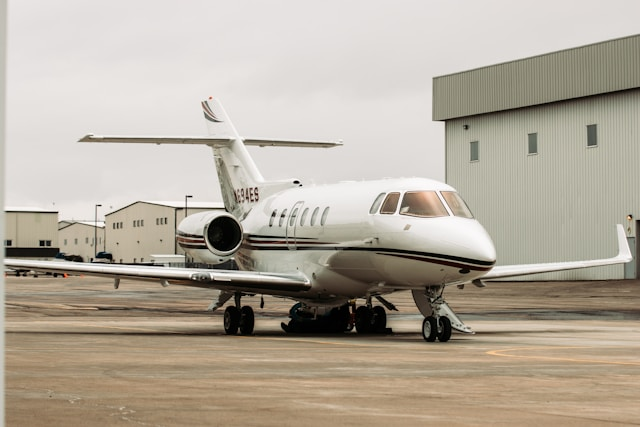

Photo by <a href="https://unsplash.com/@jakobnoahrosen?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Jakob Rosen</a> on <a href="https://unsplash.com/photos/white-and-blue-passenger-plane-kZfdHrUoB3U?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

# Data-Understanding
The dataset used for this project comes from the NTSB and includes detailed information on civil aviation accidents and selected incidents within the United States and international waters. The dataset spans from 1962 to 2023 and includes various attributes related to each accident or incident.

You can get the data from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)


## Loading-Data

In [42]:
# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.head()

c:\Users\mutis\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [44]:
# Getting more info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We notice some missing values on various columns

## Data-Cleaning

#### Handling missing values

Checking the percentage of missing data

In [45]:
def missing_values():
    """Function to check missing data in df
    
    Returns: (pd.Series) a series of the missing values as percentages
    """
    return df.isna().mean().sort_values(ascending=False)


missing_values()

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

Both Schedule and Air.carrier have more than 80% missing values so we can just drop the columns

In [46]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [47]:
df.drop(['Schedule', 'Air.carrier'], axis=1, inplace=True)

In [48]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Checking the make and model which are one of our main columns

In [49]:
missing_values()[['Make', 'Model']]

Make     0.000709
Model    0.001035
dtype: float64

Only a small percentage is missing so we drop the few rows with missing entries

In [50]:
df.dropna(subset=['Make', 'Model'], inplace=True)

In [51]:
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

Handling missing values for the columns with continuous data by imputing the mean

In [52]:
# columns with continuous data
continuous_data_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

for col in continuous_data_cols:
    mean = np.floor(df[col].mean())
    df[col].fillna(mean, inplace=True)
    
# confirm no missing values
df[continuous_data_cols].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
dtype: int64

Now we check other columns with categorical data

In [53]:
df['Amateur.Built'].value_counts()

No     80240
Yes     8438
Name: Amateur.Built, dtype: int64

There are only two categories in this column and No appears the most hence we impute it for the missing values

In [54]:
df['Amateur.Built'].fillna(
    df['Amateur.Built'].mode()[0],
    inplace=True
)

df['Amateur.Built'].isna().sum()

0

In [55]:
missing_values()

FAR.Description           0.640267
Aircraft.Category         0.636787
Longitude                 0.613211
Latitude                  0.613109
Airport.Code              0.434392
Airport.Name              0.405860
Broad.phase.of.flight     0.305192
Publication.Date          0.155051
Engine.Type               0.078917
Report.Status             0.071359
Purpose.of.flight         0.069140
Weather.Condition         0.050002
Aircraft.damage           0.035730
Registration.Number       0.014362
Injury.Severity           0.011028
Country                   0.002534
Location                  0.000586
Event.Date                0.000000
Accident.Number           0.000000
Investigation.Type        0.000000
Make                      0.000000
Model                     0.000000
Amateur.Built             0.000000
Number.of.Engines         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Event.Id            

In [56]:
df['Aircraft.Category'].value_counts()

Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

The Aircraft.Category is missing alot of values but it is key for our analysis so we just create a new category for the missing values

In [57]:
df['Aircraft.Category'].fillna('missing', inplace=True)
df['Aircraft.Category'].isna().sum()

0

Since the other columns are categorical we can fill missing values with a new category 'missing'

In [58]:
df.fillna('missing', inplace=True)
df.isna().sum().sum()

0

In [59]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,missing,missing,missing,missing,...,missing,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,missing
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,missing,missing,missing,missing,...,missing,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,missing,missing,...,missing,Personal,3.0,0.0,0.0,5.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,missing,missing,missing,missing,...,missing,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,missing,missing,missing,missing,...,missing,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data-Aggregation

### Fixing Case in Make and Model columns

In [60]:
# Inspecting the make and model columns
df[['Make', 'Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88884,PIPER,PA-28-151
88885,BELLANCA,7ECA
88886,AMERICAN CHAMPION AIRCRAFT,8GCBC
88887,CESSNA,210N


The make has some names that are in different cases

we convert make to title case and model to uppercase

In [61]:
# Convert make column to title case
df['Make'] = df['Make'].map(
    lambda x: x.title()
)

# Convert Model column to Upper case
df['Model'] = df['Model'].map(
    lambda x: x.upper()
)

df[['Make', 'Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88884,Piper,PA-28-151
88885,Bellanca,7ECA
88886,American Champion Aircraft,8GCBC
88887,Cessna,210N


### Understanding the Injury Severity column

In [62]:
# Checking categories of the Injury severity column
df['Injury.Severity'].value_counts()

Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(49)         1
Fatal(206)        1
Fatal(111)        1
Fatal(124)        1
Fatal(31)         1
Name: Injury.Severity, Length: 110, dtype: int64

In [63]:
# Inspecting the fatal category
df[df['Injury.Severity'].str.contains(
    'Fatal'
)].head()[['Injury.Severity', 'Total.Fatal.Injuries']]

,Injury.Severity,Total.Fatal.Injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0


The fatal category includes the number of fatal injuries in brackets

We can just use one category 'Fatal'

In [64]:
# Converting all fatal to one category
df['Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal(' in x else x
)
df['Injury.Severity'].value_counts()

Non-Fatal      67305
Fatal          17793
Incident        2214
missing          979
Minor            218
Serious          173
Unavailable       95
Name: Injury.Severity, dtype: int64

Now we have one category for Fatal

### Converting the Date to datetime datatype

In [65]:
# Checking data type of the Event date column
df['Event.Date'].dtype

dtype('O')

Converting  Event date to datetime instead of object

In [66]:
# Convert to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88777 entries, 0 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88777 non-null  object        
 1   Investigation.Type      88777 non-null  object        
 2   Accident.Number         88777 non-null  object        
 3   Event.Date              88777 non-null  datetime64[ns]
 4   Location                88777 non-null  object        
 5   Country                 88777 non-null  object        
 6   Latitude                88777 non-null  object        
 7   Longitude               88777 non-null  object        
 8   Airport.Code            88777 non-null  object        
 9   Airport.Name            88777 non-null  object        
 10  Injury.Severity         88777 non-null  object        
 11  Aircraft.damage         88777 non-null  object        
 12  Aircraft.Category       88777 non-null  object

### Creating new column for Year of occurence

In [67]:
# Creating new collumn for year
df['year'] = df['Event.Date'].map(
    lambda x: x.year
)

In [68]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year'],
      dtype='object')

### Creating new column for total number of injured people

In [69]:
# New column for total injuries
df['Total.Injured'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Serious.Injuries']
)

### Creating unique name for each aircraft

**format** : make_model

In [70]:
# New column for aircraft name
df['Aircraft.Name'] = df['Make'] + '_' + df['Model']

In [71]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year',
       'Total.Injured', 'Aircraft.Name'],
      dtype='object')

# Data-Analysis

## Distribution of accidents and incidents over the years

plotting to see the trend of accidents and incidents over the years

In [72]:
# Grouping df by year
accident_incident_years = df.groupby(
    'year'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()

accident_incident_years.columns.name = ""
accident_incident_years.head()

,year,Accident,Incident
0,1948,1,0
1,1962,1,0
2,1974,1,0
3,1977,1,0
4,1979,2,0


We've just aggrregated to get the count of accidents and incidents per year

#### Plotting the distribution of accidents and incidents

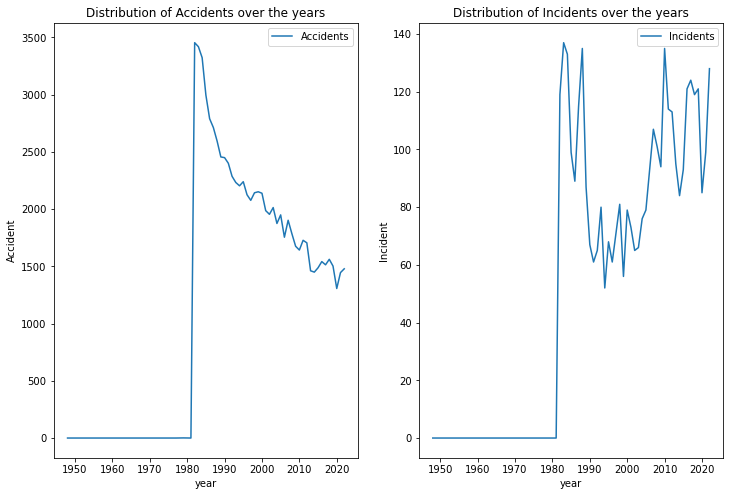

In [73]:
# plotting the distribution

# creating the figure and axis
fig, axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

# Plotting Accidents
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Accident',
    label='Accidents',
    ax=axes[0]
)

# plotting incidents
sns.lineplot(
    data=accident_incident_years,
    x='year',
    y='Incident',
    label='Incidents',
    ax=axes[1]
)

axes[0].set_title('Distribution of Accidents over the years')
axes[1].set_title('Distribution of Incidents over the years')

plt.legend();

There was a significant increase in accident cases after 1980, but the number of cases has been decreasing ever since then.

There is also a significant increase on incidents from 1980 and seem to remain constant

## Filtering to get Only the AirPlanes

** Our main interest is on AirPlanes so we can filter to only include Airplanes

In [74]:
# Only including Airplane category
df = df[df['Aircraft.Category'] == 'Airplane']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,missing,missing,...,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,1.0,Mcdonnell Douglas_DC9
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,missing,missing,missing,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,0.0,Cessna_140
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,missing,missing,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,0.0,Cessna_401B
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,missing,missing,missing,missing,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,1.0,Bellanca_17-30A
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,missing,missing,T72,HEARNE MUNICIPAL,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982,1.0,Cessna_R172K


# Risk-Metrics

### 1-Accident-Incident-occurences

we check to see the aircraft models with the lowest number of accident and incident cases

In [75]:
# the count of accidents and incidents for each model
accident_incident_count_df = df.groupby(
    'Aircraft.Name'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()


accident_incident_count_df.columns.name = ""
accident_incident_count_df

,Aircraft.Name,Accident,Incident
0,177Mf Llc_PITTS MODEL 12,1,0
1,2007 Savage Air Llc_EPIC LT,0,1
2,2021Fx3 Llc_CCX-2000,2,0
3,3Xtrim_450 ULTRA,1,0
4,5 Rivers Llc_SQ-2,1,0
...,...,...,...
7488,Zlin_Z50,1,0
7489,Zodiac_601XL,1,0
7490,Zubair S Khan_RAVEN,1,0
7491,Zuber Thomas P_ZUBER SUPER DRIFTER,1,0


Adding new column for total count

In [76]:
# Adding new column for total count of accidents and incidents
accident_incident_count_df['total_count'] = (
    accident_incident_count_df['Accident'] +
    accident_incident_count_df['Incident']
)

Getting the lowest risk According to Accident and incident count
- Should have the lowest total count
- lowest accidents(preferably no accidents)
- Fewest Incidents

In [77]:
# Get lowest total count of accidents and incidents
lowest_count = accident_incident_count_df['total_count'].min()
lowest_count

1

Lowest total count is 1 therefore we filter to get those models with lowest count and no accidents

In [78]:
# filter to get records with lowest count of total accidents and incidents but no accidents
first_metric_lowest_risk = accident_incident_count_df.loc[
    (accident_incident_count_df['total_count'] == 1) &
    (accident_incident_count_df['Accident'] == 0)
]

first_metric_lowest_risk

,Aircraft.Name,Accident,Incident,total_count
1,2007 Savage Air Llc_EPIC LT,0,1,1
6,777_FF2,0,1,1
269,Airbus Industrie_300B4-200,0,1,1
274,Airbus Industrie_A300,0,1,1
276,Airbus Industrie_A300B4-622R,0,1,1
...,...,...,...,...
7005,Tomisin Thomas J_RUTAN LONG EZ,0,1,1
7023,Ttx Air Llc_LANCAIR,0,1,1
7032,Turbo Thrush_S2R,0,1,1
7047,Ultramagic Sa_T210,0,1,1


In [79]:
# Get names of airplanes of the filtered df
first_metric_final_airplanes = list(first_metric_lowest_risk['Aircraft.Name'])

We now have the models which have recorded no accidents only incidents.

This are the lowest risk according to the first metric

Filtering entire df to contain only our lowest risk airplanes according to first risk metric

In [80]:
# Create a df for data filtered according to first metric
first_metric_df = df.set_index('Aircraft.Name').loc[first_metric_final_airplanes]

### 2-Injuries

Checking to eliminate the models with high number of incident causing injuries

In [81]:
# Check categories in Injury Severity columns
df['Injury.Severity'].value_counts()

Non-Fatal      21041
Fatal           5171
missing          812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: Injury.Severity, dtype: int64

#### Trying to understand the Unavailable column

In [82]:
# Get the df for records where Injury Severity column is Unavailable
unavailable_df = df[df['Injury.Severity'] == 'Unavailable']
unavailable_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
41656,20001208X07697,Accident,DCA97WA043,1997-04-27,"JINAN, CHINA",China,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Mcdonnell Douglas_MD-82
42287,20001208X08352,Accident,DCA97WA054,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Learjet_LR-31
42847,20001208X08992,Accident,DCA98WA082,1997-10-09,"HARBIN, CHINA",China,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Cessna_650-0220
42935,20001208X08991,Accident,DCA98WA005,1997-10-24,"MONTEVIDEO, URUGUAY",Uruguay,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1997,0.0,Mcdonnell Douglas_MD-11
43693,20001211X09838,Accident,DCA98WA050,1998-04-12,"ALMA-ATA, KAZAKHSTAN",Kazakhstan,missing,missing,missing,missing,...,0.0,0.0,5.0,UNK,missing,Foreign,missing,1998,0.0,Boeing_737-200


In [83]:
# Check if cases are accidents or incidents or both
unavailable_df['Investigation.Type'].value_counts()

Accident    20
Name: Investigation.Type, dtype: int64

only accidents are involved in this category

In [84]:
# Check total injuries for this cases
unavailable_df['Total.Injured'].value_counts()

0.0    20
Name: Total.Injured, dtype: int64

    Also no injuries, so we can conclude that the 'Unavailable' category is for accident cases with no injuries

#### Understanding the Incident Category

In [85]:
# Get df where Injury Severity column is Incident
incident_cat_df = df[df['Injury.Severity'] == 'Incident']
incident_cat_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured,Aircraft.Name
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,missing,missing,VNY,VAN NUYS,...,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983,1982,0.0,Piper_PA-24-180
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,missing,missing,missing,missing,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983,1982,0.0,Rockwell_114
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,missing,missing,ORD,CHICAGO O'HARE INTER'L,...,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983,1982,0.0,Lockheed_L-1011
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,missing,missing,CKB,BENEDUM,...,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983,1982,0.0,Embraer_EMB-110P1
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,missing,missing,IAD,missing,...,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983,1982,0.0,De Havilland_DHC-6-300


In [86]:
# Check the type of case it was
incident_cat_df['Investigation.Type'].value_counts()

Incident    244
Name: Investigation.Type, dtype: int64

Only involve incident cases

In [87]:
# Check if there were injuries
incident_cat_df['Total.Injured'].value_counts()

0.0      229
1.0        8
2.0        3
380.0      1
14.0       1
33.0       1
17.0       1
Name: Total.Injured, dtype: int64

mostly no number of injuries

In [88]:
# Check what type of injuries if present
incident_cat_df[incident_cat_df['Total.Injured'] > 0][
    ['Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries']
]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
425,0.0,0.0,1.0
506,1.0,0.0,0.0
1347,0.0,0.0,17.0
2282,0.0,0.0,1.0
2335,0.0,0.0,33.0
2394,0.0,0.0,1.0
2614,0.0,1.0,1.0
3170,0.0,0.0,1.0
3298,0.0,0.0,1.0
3578,0.0,0.0,14.0


For cases of injuries there are only minor injuries in the Incident Category (only one case of fatal injuries and serious injury)

So we can conclude that for the 'Incident' category it involves Incident cases with no or minor injuries

**This is the favourable category to chooose as the lowest risk

##### Filtering To get the Incident category

In [89]:
# filtering according to the second metric
second_metric_df = first_metric_df[
    first_metric_df['Injury.Severity'] == 'Incident'
]

second_metric_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Airbus Industrie_300B4-200,20081003X63346,Incident,ENG05WA019,2005-06-29,"Amsterdam, The Netherlands, Netherlands",Netherlands,missing,missing,EHAM,Amsterdam Inter. Schipol,...,0.0,0.0,0.0,279.0,missing,missing,Foreign,20-10-2009,2005,0.0
Airbus Industrie_A300,20001211X10544,Incident,DCA98WA066,1998-07-09,"LONDON, United Kingdom",United Kingdom,missing,missing,missing,missing,...,0.0,0.0,0.0,1.0,UNK,missing,Foreign,missing,1998,0.0
Bac_1-11-204AF,20020917X03096,Incident,CHI82IA179,1982-05-21,"DAYTON, OH",United States,missing,missing,DAY,COX INTERNATIONAL,...,0.0,0.0,0.0,48.0,IMC,Landing,Probable Cause,21-05-1983,1982,0.0
Beech_18,20020917X02892,Incident,ATL82IA154,1982-06-06,"MACON, GA",United States,missing,missing,MCN,LEWIS B. WILSON,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,06-06-1983,1982,0.0
Beech_65-88,20020917X01900,Incident,CHI82IA102,1982-03-25,"KALAMAZO, MI",United States,missing,missing,AZO,KALAMAZOO,...,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,25-03-1983,1982,0.0


In [90]:
# Getting the length of the df
len(second_metric_df)

77

Now we are down to 77 cases

we continue to  filter since the number is still large

### 3-Damage

In [91]:
# Checking categories in the Damage column
df['Aircraft.damage'].value_counts()

Substantial    21698
Destroyed       3542
missing         1279
Minor            961
Unknown          100
Name: Aircraft.damage, dtype: int64

Filtering to get the minor category

In [92]:
# Create third metric df with only minor damages
third_metric_df = (
    second_metric_df[second_metric_df['Aircraft.damage'] == 'Minor']
)

third_metric_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured
Aircraft.Name,,,,,,,,,,,,,,,,,,,,,
Airbus Industrie_300B4-200,20081003X63346,Incident,ENG05WA019,2005-06-29,"Amsterdam, The Netherlands, Netherlands",Netherlands,missing,missing,EHAM,Amsterdam Inter. Schipol,...,0.0,0.0,0.0,279.0,missing,missing,Foreign,20-10-2009,2005,0.0
Airbus Industrie_A300,20001211X10544,Incident,DCA98WA066,1998-07-09,"LONDON, United Kingdom",United Kingdom,missing,missing,missing,missing,...,0.0,0.0,0.0,1.0,UNK,missing,Foreign,missing,1998,0.0
Beech_18,20020917X02892,Incident,ATL82IA154,1982-06-06,"MACON, GA",United States,missing,missing,MCN,LEWIS B. WILSON,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,06-06-1983,1982,0.0
Beech_65-88,20020917X01900,Incident,CHI82IA102,1982-03-25,"KALAMAZO, MI",United States,missing,missing,AZO,KALAMAZOO,...,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,25-03-1983,1982,0.0
Beech_B99,20020917X04335,Incident,ATL83IA018,1982-10-28,"CLARKSVILLE, TN",United States,missing,missing,CKV,OUTLAW FIELD,...,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-10-1983,1982,0.0


In [93]:
# Check length of new df
len(third_metric_df)

46

Down to 46 cases

We look for another metric

still to many to recommend

### 4-Amatuer-Built

Filter to get only professional Airplanes

In [94]:
# Filter to remove amateur built airplanes
fourth_metric_df = third_metric_df[third_metric_df['Amateur.Built'] == 'No']
len(fourth_metric_df)

42

In [95]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year',
       'Total.Injured', 'Aircraft.Name'],
      dtype='object')

### 5-Number-of-Engines

Getting the number of incidents and number of engines per model

In [96]:
# Get mean number of aircrafts per model
number_of_engines = df.groupby('Aircraft.Name')['Number.of.Engines'].mean().round()

# get number of incidents per model
number_of_incidents = df.groupby(
    'Aircraft.Name'
)['Investigation.Type'].value_counts().unstack(fill_value=0)['Incident']

# Get only
# number_of_engines = number_of_engines[
#     number_of_incidents.index
# ]

# Combine the two series to get a dataframe with name , number of engines and incident count
engines_incidents = pd.concat([number_of_incidents, number_of_engines], axis=1).reset_index()
engines_incidents

,Aircraft.Name,Incident,Number.of.Engines
0,177Mf Llc_PITTS MODEL 12,0,1.0
1,2007 Savage Air Llc_EPIC LT,1,1.0
2,2021Fx3 Llc_CCX-2000,0,1.0
3,3Xtrim_450 ULTRA,0,1.0
4,5 Rivers Llc_SQ-2,0,1.0
...,...,...,...
7488,Zlin_Z50,0,1.0
7489,Zodiac_601XL,0,1.0
7490,Zubair S Khan_RAVEN,0,1.0
7491,Zuber Thomas P_ZUBER SUPER DRIFTER,0,1.0


Checking the relationship between Number of engines and Number of Incidents

In [452]:
# Get the correlation
engines_incidents.corr()

,Incident,Number.of.Engines
Incident,1.000000,0.049551
Number.of.Engines,0.049551,1.000000


Plotting the relationship

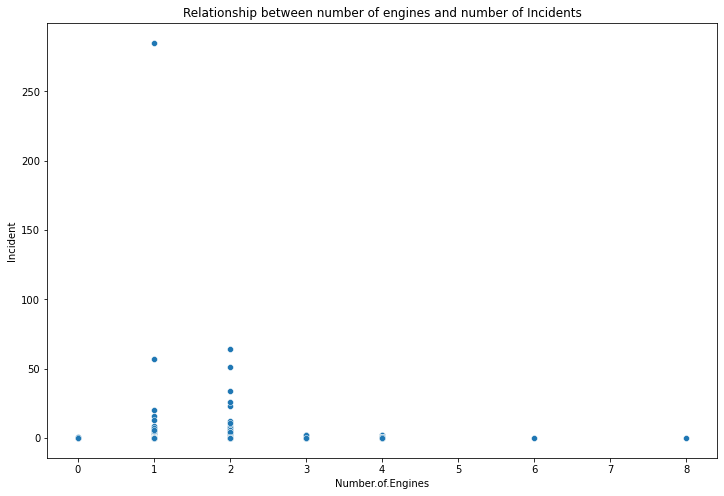

In [453]:
# creating axes and figure
rel_fig, ax = plt.subplots(figsize=(12, 8))

# Plottting a scatter plot for the relationship
sns.scatterplot(data=engines_incidents, x='Number.of.Engines', y='Incident')

# Setting the title
ax.set_title('Relationship between number of engines and number of Incidents');

There is no relationship between the Number of engines and the occurence of incidents therefore we cannot use the number of engines to measure the risk

### 6-Engine-type

Get the engine type associated with less incidents

In [454]:
# Checking available categories in the engine type column
df['Engine.Type'].value_counts()

Reciprocating      20696
missing             4213
Turbo Prop          1366
Turbo Fan            967
Turbo Jet            158
Unknown              151
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [455]:
# Creating df of engine type and the accident and incidents associated
engine_accidents = df.groupby(
    'Engine.Type'
)['Investigation.Type'].value_counts().unstack(fill_value=0).reset_index()


# Sorting
engine_accidents.sort_values(by='Incident', ascending=False, inplace=True)


engine_accidents.columns.name = ''
engine_accidents

,Engine.Type,Accident,Incident
9,missing,3362,851
3,Turbo Fan,574,393
2,Reciprocating,20511,185
5,Turbo Prop,1252,114
8,Unknown,98,53
4,Turbo Jet,118,40
1,Geared Turbofan,0,12
6,Turbo Shaft,10,1
0,Electric,5,0
7,UNK,1,0


Checking the available engines in filtered df to compare each and get the best(One with few cases of incidents)

In [456]:
# Create list of available engines in the filtered df
available_engines = list(
    fourth_metric_df['Engine.Type'].value_counts().index
)

# Removing the Unkown and missing categories
available_engines.remove('Unknown')
available_engines.remove('missing')

Creating a sorted df of the engines according to the number of incident cases 


In [457]:
# Sorting the df from lowest risk engine to highest risk
sorted_engine_df = (
    engine_accidents.set_index(
        'Engine.Type'
    ).loc[available_engines].sort_values(by='Incident').reset_index()
)
sorted_engine_df

,Engine.Type,Accident,Incident
0,Turbo Jet,118,40
1,Turbo Prop,1252,114
2,Reciprocating,20511,185
3,Turbo Fan,574,393


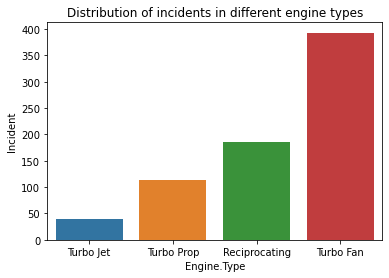

In [468]:
# plotting the distribution of the incidents in the engine types
fig, ax = plt.subplots()
sns.barplot(
    data=sorted_engine_df,
    x='Engine.Type',
    y='Incident'
)

# Setting the title
ax.set_title('Distribution of incidents in different engine types');

#### Filtering the data to get the aircrafts with the least chance of getting incidents

In [466]:
# List of sorted engine types
sorted_engines_names = list(sorted_engine_df['Engine.Type'])

# creating final df according to sixth metric
sixth_metric_df = fourth_metric_df[
    fourth_metric_df['Engine.Type'] == sorted_engines_names[0]
]

# get the length of the df
len(sixth_metric_df)

2

We are down to two choices

In [470]:
sixth_metric_df.reset_index(inplace=True)
sixth_metric_df

,index,Aircraft.Name,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year,Total.Injured
0,0,Boeing_B737-2H4,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,missing,missing,...,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983,1982,0.0
1,1,Rockwell_NA-265-80,20020917X02153,Incident,FTW82IA146,1982-03-20,"HOUSTON, TX",United States,missing,missing,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,20-03-1983,1982,0.0


In [471]:
sixth_metric_df[['Make', 'Model']]

,Make,Model
0,Boeing,B737-2H4
1,Rockwell,NA-265-80


# Recommendation

- Based on the analysis we came down to two Aircrafts that are the lowest risk

    |   | Make     | Model     |
    | - | -------- |---------- |
    | 1.| Boeing   | B737-2H4  |
    | 2.| Rockwell | NA-265-80 |